# Exploration

In his notebook, you have all the tools necessary to analyze a given graph, constructed from a dataset given as input. <br/>

## Table of contents
1. [Loading dataset](#Part-I:-Loading-dataset) 
2. [Graph properties](#Part-II:-Graph-properties) 
3. [Type of graph identification](#Part-III:-Type-of-graph-identification)
4. [Nodes properties](#Part-IV:-Nodes-properties)
5. [Attributes analysis](#Part-V:-Attributes-analysis)

## Part I: Loading dataset

We constructed our graph using Seealsology tool, and we chose to use the following Wikipedia pages for this purpose:
- [Machine learning](https://en.wikipedia.org/wiki/Machine_learning)
- [Natural language processing](https://en.wikipedia.org/wiki/Natural_language_processing)
- [Artificial intelligence](https://en.wikipedia.org/wiki/Artificial_intelligence)
- [Artifical neural network](https://en.wikipedia.org/wiki/Artificial_neural_network)
- [Chatbot](https://en.wikipedia.org/wiki/Chatbot)
- [Intelligent agent](https://en.wikipedia.org/wiki/Intelligent_agent)
- [Data visualization](https://en.wikipedia.org/wiki/Data_visualization)

In [3]:
# Standard librairies
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import operator
import collections
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

In [7]:
# loading the tsv file that we generated from seealsology
df = pd.read_csv("ml-nlp-ai-ann-chatbot-ia-dataviz-dist2.tsv", sep = "\t")
df.head()

,source,target,depth
0,intelligent agent,software agent,1
1,intelligent agent,cognitive architecture,1
2,intelligent agent,cognitive radio,1
3,intelligent agent,cybernetics,1
4,intelligent agent,computer science,1


In [8]:
G = nx.from_pandas_edgelist(df, "source", "target", edge_attr=True, create_using=nx.Graph())

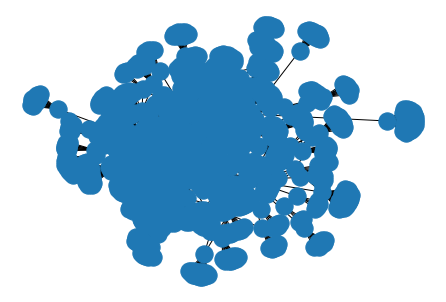

In [9]:
# let's have a small preview of the graph
nx.draw(G)

As we can see, this graph seems to be pretty dense. But that was expected, as it was generated from "See also" sections of chosen Wikipedia pages.

## Part II: Graph properties

In [10]:
# computation of the number of connected components of the graph
n_cc = nx.number_connected_components(G)
print("The graph has", n_cc, "connected components.")

The graph has 1 connected components.


In [11]:
# computation of the diameter of the graph
A = nx.adjacency_matrix(G)
diam = nx.diameter(G)
print("The graph has a diameter of", diam, ".")

The graph has a diameter of 9 .


First important point is that the graph is connected, and that is essential for our product to have all the nodes that are linked to some others, otherwise we would never use some nodes of our graph. On the other hand, a diameter of 9 is pretty convenient, as we know that the graph is not too wide.

## Part III: Type of graph identification

The average degree of this graph is 2.4682675814751285


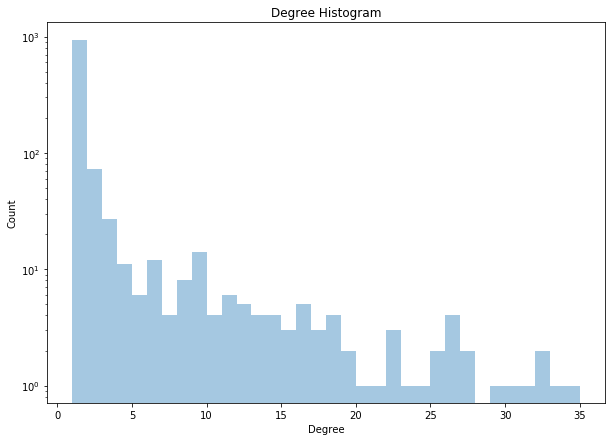

In [14]:
# study of the degree distribution of the graph
degree_sequence = sorted([d for n, d in G.degree()], reverse=True) 
print("The average degree of this graph is", np.mean(degree_sequence))

plt.figure(figsize=(10,7))
sns.distplot(degree_sequence[int(len(degree_sequence) * 0.005):], kde=False, hist_kws={'log':True})
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

This network does not seem to be a scale-free network, as its degree distribution does not follow a power law.

In [20]:
# let's check if we have a small-world network
print("The average distance between any 2 nodes is", nx.average_shortest_path_length(G))
print("And we have log(N) =", np.log(len(G.nodes)))

The average distance between any 2 nodes is 5.220687725910821
And we have log(N) = 7.061334366910438


As our average distance between any 2 nodes is close to log(N), we might have a small-world network here. <br/>
Finally, we can see that we do not have a regular network, as the number of nodes is not the same for every node. Otherwise, the small visualization that we had above confirm that we do not have a sampled manifold either.

## Part IV: Nodes properties

In [21]:
# clustering coefficients of the nodes 
clus_coefs = nx.clustering(G)
sorted_clus_coefs = collections.OrderedDict(sorted(clus_coefs.items(), key=operator.itemgetter(1), reverse=True))
print("Top 20 nodes with highest clustering coefficient:")
list(sorted_clus_coefs.items())[:20]

Top 20 nodes with highest clustering coefficient:


[('twitterbot', 1.0),
 ('catastrophic interference', 1.0),
 ('neural gas', 1.0),
 ('comparison of agent-based modeling software', 1.0),
 ('agent-based computational economics', 1.0),
 ('distributed artificial intelligence', 1.0),
 ('digital organism', 1.0),
 ('duck test', 1.0),
 ('cognitive map', 1.0),
 ('neural correlate', 1.0),
 ('neural decoding', 1.0),
 ('neuroethology', 1.0),
 ('motion perception', 1.0),
 ('systems neuroscience', 1.0),
 ('liquid state machine', 1.0),
 ('sparse coding', 1.0),
 ('computational visualistics', 1.0),
 ('interactivity', 1.0),
 ('climate spiral', 1.0),
 ('craftivism', 1.0)]

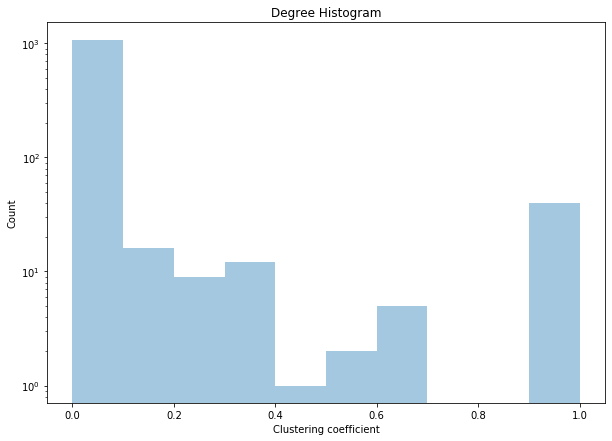

In [22]:
# clustering coefficients distribution
cc_sequence = list(clus_coefs.values())

plt.figure(figsize=(10,7))
sns.distplot(cc_sequence, kde=False, hist_kws={'log':True}, bins=10)
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Clustering coefficient")
plt.show()

As we can see on the above plot, we have a considerable number of nodes that have a clustering coefficient of 1, that is, a neighborhood that is fully connected. Otherwise, the majority of the nodes have a clustering coefficient less than 0.4, and that is quite expected regarding how we constructed this network.

In [23]:
# study of the centrality of the nodes
cent = nx.degree_centrality(G)
sorted_cent = collections.OrderedDict(sorted(cent.items(), key=operator.itemgetter(1), reverse=True))
print("Top 20 nodes with highest centrality:")
list(sorted_cent.items())[:20]

Top 20 nodes with highest centrality:


[('artificial neural network', 0.03948497854077253),
 ('cognitive science', 0.0351931330472103),
 ('analytics', 0.03261802575107296),
 ('simulated reality', 0.03175965665236051),
 ('universal basic income', 0.03175965665236051),
 ('data analysis', 0.030042918454935622),
 ('semantic web', 0.028326180257510727),
 ('cognitive architecture', 0.027467811158798282),
 ('natural language processing', 0.027467811158798282),
 ('multi-agent system', 0.026609442060085836),
 ('scientific visualization', 0.02575107296137339),
 ('biologically inspired computing', 0.02489270386266094),
 ('visual analytics', 0.02317596566523605),
 ('information retrieval', 0.02317596566523605),
 ('cybernetics', 0.022317596566523604),
 ('fuzzy logic', 0.022317596566523604),
 ('multiple-agent system', 0.022317596566523604),
 ('evolutionary computation', 0.022317596566523604),
 ('data visualization', 0.02145922746781116),
 ('information architecture', 0.02145922746781116)]

Centrality is another interesting metric to identify the most important vertices in our network. And as we can see, terms that seems to be the most important are in general central concepts of the pages we chose to generate the network from. On the other hand, as the highest centrality coefficients are quite reasonable, we can confirm that our graph is not only gravitating around a few very important nodes, but more repartited around a considerable number of important contexts, and that is what we would like to have to be able to design an interesting product.

## Part V: Attributes analysis

Some communities:
{'fuzzy agent', 'intelligent agent', 'peas', 'era of intelligent agents'}
{'never-ending language learning', 'cognitive architecture comparison', 'bayesian approaches to brain function', 'conceptual space', 'knowledge level', 'unified theory of cognition', 'biologically inspired cognitive architectures', 'cognitive architecture', 'open mind common sense', 'neural correlates of consciousness', 'image schema', 'cognitive computing'}


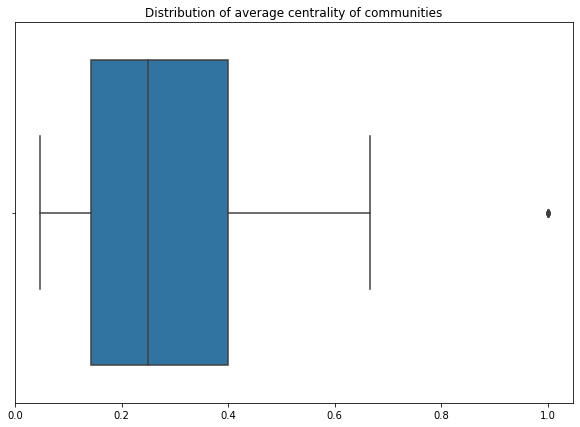

In [24]:
# community detection within the nodes attributes
communities = list(nx.algorithms.community.label_propagation.label_propagation_communities(G))
print("Some communities:")
print(communities[0])
print(communities[1])

# computation of average centrality among communities
avg_cent = []
for com in communities:
    G_tmp = G.subgraph(com)
    cent = nx.degree_centrality(G_tmp)
    avg_cent.append(np.mean(list(cent.values())))
    
# box plot to have a representation of the average centrality among communities
plt.figure(figsize=(10,7))
plt.title("Distribution of average centrality of communities")
sns.boxplot(avg_cent)
plt.show()

By using label propagation algorithm, we have been able to get the communities among the nodes of our network. It is interesting to study communities, as we can check that these communities have members that are related to each other (in terms of topic). Another interesting metric we can study once we have communities is the average centrality among these commmunities. That allow us to confirm that these communities have members that are quite strongly connected with each other, and that these communities were not only formed on a few links between each other. And the above boxplot illustrates that in average, centrality of our communities is quite decent, and that most of the communities have a centrality that stands in a reasonable interval. 

In [25]:
# some basic NLP to study nodes attributes
nodes_emb = list(G.nodes)
print("Some nodes embeddings:")
print(nodes_emb[:10])

# get the list of all the words from the articles titles
nodes_emb_flattened = [word for line in nodes_emb for word in line.split()]

# initialize a dict that counts the words occurences
counts = Counter(nodes_emb_flattened)
print("\nSome entries of the dictionnary that counts the words occurences:")
print(list(counts.items())[:7])

Some nodes embeddings:
['intelligent agent', 'software agent', 'cognitive architecture', 'cognitive radio', 'cybernetics', 'computer science', 'embodied agent', 'federated search', 'fuzzy agent', 'fuzzy logic']

Some entries of the dictionnary that counts the words occurences:
[('intelligent', 5), ('agent', 12), ('software', 18), ('cognitive', 23), ('architecture', 12), ('radio', 3), ('cybernetics', 3)]


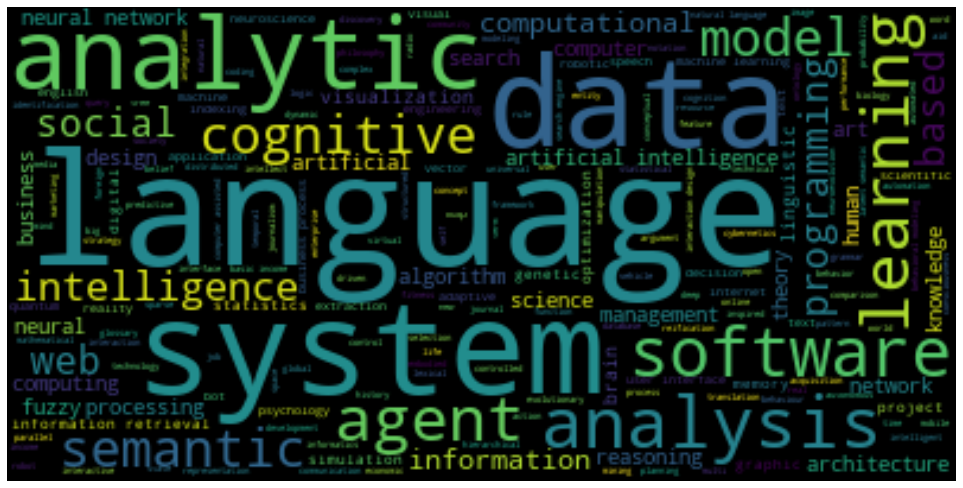

In [26]:
# creation and generation of a word cloud image, which displays words with sizes proportional to their occurences
wordcloud = WordCloud().generate((" ").join(nodes_emb))

plt.figure(figsize=(17,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

This fancy worldcloud plot is contructed by using the word occurences among all titles of the pages that form our networm. As as we can see on the above result, terms that are the strongest are hopefully central terms that define the concepts we chose to use to generate our network. For example, we can notice "language", "data", "analytic", "system", or "learning".